In [70]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

#Applying filters to image:

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu')) #Defining the Activation function
classifier.add(Dense(units = 3, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #Adam used as optimizer

#Training the Neural Network: 
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255) #Image analyzing

pics = train_data.flow_from_directory('pics',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')
#Read images from numpy array(flow_from_directory())
pics_test = test_data.flow_from_directory('pics_test',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')
classifier.fit_generator(pics,steps_per_epoch = 1500,epochs = 2,validation_data = pics_test,validation_steps = 2000)
#Training cycles set to 5 only, to decrease learning time.Accuracys found is 99.50%
# My prediction


Found 61 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/2
1500/1500 [==============================] - 690s 460ms/step - loss: 0.0256 - acc: 0.9861 - val_loss: 2.8647 - val_acc: 0.6667
Epoch 2/2
1500/1500 [==============================] - 690s 460ms/step - loss: 0.0042 - acc: 0.9986 - val_loss: 2.6866 - val_acc: 0.8000


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('TEST.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
pics.class_indices

if result[0][0] == 0 and result[0][1] == 0:
    prediction='random'
    x_shape = 4
elif result[0][0] == 0 and result[0][2] == 0:
    prediction='oval'
    x_shape = 2
else:
    prediction='circle'
    x_shape = 1
print(prediction)
print(x_shape)

In [108]:
pics.class_indices

{'circle': 0, 'oval': 1, 'random': 2}

In [109]:
list(result[0])

[0.0, 0.0, 0.0]

In [40]:
print("lol")

lol


In [185]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

#Applying filters to image:

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu')) #Defining the Activation function
classifier.add(Dense(units = 3, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #Adam used as optimizer

#Training the Neural Network: 
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255) #Image analyzing

asdf = train_data.flow_from_directory('asdf',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')
#Read images from numpy array(flow_from_directory())
asdft = test_data.flow_from_directory('asdft',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')
classifier.fit_generator(asdf,steps_per_epoch = 1500,epochs = 2,validation_data = asdft,validation_steps = 2000)

Found 63 images belonging to 3 classes.
Found 29 images belonging to 3 classes.
Epoch 1/2
1500/1500 [==============================] - 919s 613ms/step - loss: 0.0114 - acc: 0.9957 - val_loss: 0.0477 - val_acc: 0.9655
Epoch 2/2
1500/1500 [==============================] - 972s 648ms/step - loss: 2.4150e-06 - acc: 1.0000 - val_loss: 0.0588 - val_acc: 0.9655


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('TEST.PNG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
asdf.class_indices

if result[0][0] == 0 and result[0][1] == 0:
    prediction='Undefined'
    y_shape = 4
elif result[0][0] == 0 and result[0][2] == 0:
    prediction='Spiculated'
    y_shape = 5
else:
    prediction='Circumscribed'
    y_shape = 1
print(prediction)

In [114]:
asdf.class_indices

{'Circumscribed': 0, 'Spiculated': 1, 'Undefined': 2}

In [115]:
list(result[0])

[1.0, 0.0, 0.0]

In [45]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
df=pd.read_csv("mammographic_masses.data.txt",na_values=['?'],names=['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])

In [46]:
df.loc[(df['age'].isnull()) | (df['shape'].isnull()) | (df['margin'].isnull()) | (df['density'].isnull())]
df.dropna(inplace=True)

In [47]:
all_features = df[['age', 'shape', 'margin', 'density']].values

all_classes = df['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

In [48]:
scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

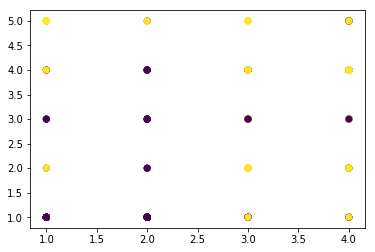

In [49]:
x_axis = df['shape']
y_axis = df['margin']


plt.scatter(x_axis, y_axis, c=all_classes)
plt.show()

In [50]:
dt=df
dt=dt[['shape','margin']]

In [51]:
model = KMeans(n_clusters=2)
model.fit(dt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [181]:
print(model.predict([[x_shape,y_shape]]))

[1]


In [182]:
f=model.predict([[x_shape,y_shape]])[0]
if f==1:
    print("Tumor is Malignant")
else:
    print("Tumor is Benign")

Tumor is Malignant


In [186]:
f

1